<a href="https://colab.research.google.com/github/Gabrielasants7/EDA/blob/main/EDA%2CBB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ANÁLISE EXPLORATÓRIA DE DADOS 

  Perfil do Investidor Tesouro Direto 

                       
#    Escopo do Projeto 
  
 1. Introdução, Definição da Temática ( Tesouro Direto)
 2. Objetivo da Análise exploratória 
 3. Obtenção dos Dados (Fonte)
 4. Inicialização da Análise exploratória 
 5. Dicionário das Variáveis
 6. Primeira Análise com a biblioteca sweetviz
 7. Descrição da Primeira Análise com sweetviz
 8. Limpeza e Transformação dos Dados 
 9. Curiosidade 
 10. Análise de Séries Temporais  
 11. conclusão 
  

## 1. Definição da Temática ( Tesouro Direto)

O Tesouro Direto é um programa, criado pelo Tesouro Nacional, que permite que qualquer pessoa comum CPF,
possa investir em TÍTULOS PÚBLICOS, pela internet.

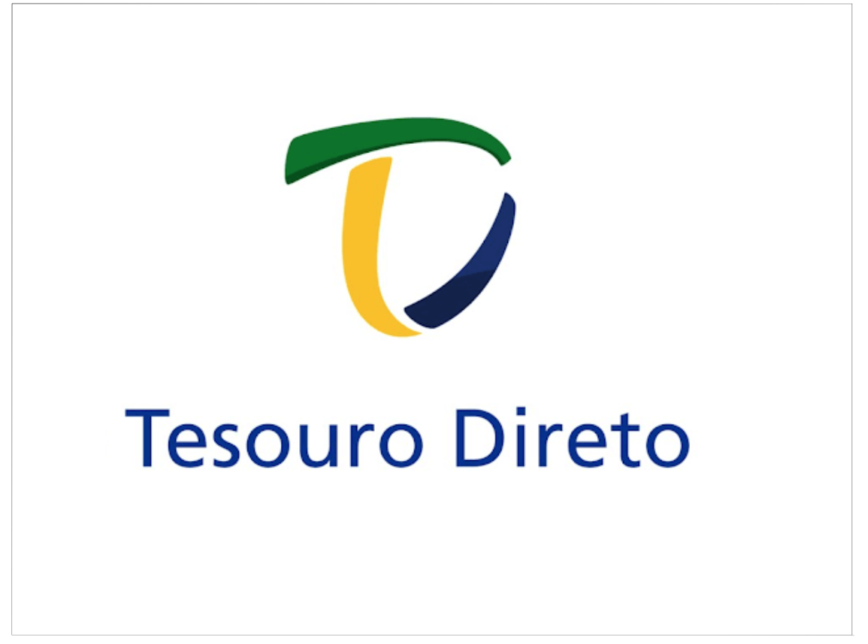

## 2. Objetivo

O objetivo dessa análise é extrair conhecimento acerca do perfil do investidor do tesouro direto .




## 3. Fonte 
https://dados.gov.br/dataset

##4. Inicialização da Análise exploratória ⬇

In [ ]:
#Importando os Pacotes Necessários
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf, pacf
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
import datetime
import plotly.express as px
from scipy.stats.morestats import Std_dev
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importando e abrindo as primeiras 20 linhas do dataset
tesourodireto = pd.read_csv('/content/drive/MyDrive/InvestidoresTesouroDireto.csv', sep=";", encoding='iSO=8859-1')


tesourodireto.head(20)

,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Pais do Investidor,Situacao da Conta,Operou 12 Meses
0,164912,11/12/2008,Casado(a) com brasileiro(a) nato(a),M,ENGENHEIRO,71,SP,SAO PAULO,BRASIL,D,N
1,165560,17/12/2008,Solteiro(a),M,BANCARIO E ECONOMIÁRIO,36,SP,SAO PAULO,BRASIL,D,N
2,166190,22/12/2008,Solteiro(a),F,OUTROS,67,SP,SAO PAULO,BRASIL,D,N
3,166916,29/12/2008,Casado(a) com brasileiro(a) nato(a),M,BANCARIO E ECONOMIÁRIO,57,SP,SAO PAULO,BRASIL,D,N
4,167718,07/01/2009,Solteiro(a),F,SERVIDOR PÚBLICO FEDERAL,60,SP,SAO PAULO,BRASIL,D,N
5,167888,08/01/2009,Casado(a) com brasileiro(a) nato(a),F,ADMINISTRADOR,44,SP,SANTANA DE PARNAIBA,BRASIL,D,N
6,169303,19/01/2009,Casado(a) com brasileiro(a) nato(a),M,PROFESSOR DE ENSINO SUPERIOR,49,SP,SAO PAULO,BRASIL,D,N
7,169310,19/01/2009,Casado(a) com brasileiro(a) nato(a),F,COMUNICÓLOGO,44,SP,SAO PAULO,BRASIL,D,N
8,169949,23/01/2009,Casado(a) com brasileiro(a) nato(a),M,APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO),80,SP,SAO CAETANO DO SUL,BRASIL,D,N
9,171574,06/02/2009,Casado(a) com brasileiro(a) nato(a),M,ADMINISTRADOR,56,SP,SAO PAULO,BRASIL,D,N


In [ ]:
#Verificando as colunas
tesourodireto.columns

Index(['Codigo do Investidor', 'Data de Adesao', 'Estado Civil', 'Genero',
       'Profissao', 'Idade', 'UF do Investidor', 'Cidade do Investidor',
       'Pais do Investidor', 'Situacao da Conta', 'Operou 12 Meses'],
      dtype='object')

##5.Dicionário das Variáveis

1. Coluna  – Codigo do investidor
2. Coluna  – Data da Adesao
3. Coluna  – Estado Civil/ Solteiro(a), Desquitado(a), Viúvo(a), Divorciado(a), Casado(a) com brasileiro(a) nato(a), 
Casado(a) com brasileiro(a) naturalizado(a), Casado(a) com estrangeiro(a), União estável, Separado judicialmente, 
Não se aplica;
4. Coluna  - Genero /  M (Masculino), F (Feminino) ou N (Não se aplica
5. Coluna  – Profissao
6. Coluna  – Idade
7. Coluna  – UF do Negociador/ Siglas dos estados brasileiros e do Distrito Federal.

8. Coluna  – Cidade do Negociador
9. Coluna  – Pais Negociador/
10. Coluna – Situacao da Conta/: A (Ativo), D (Desativado).
11. Coluna – Operou 12 Meses/ Domínio: S (Sim), N (Não)



##6. primeira Análise com a biblioteca Sweetviz ⬇

                                             |          | [  0%]   00:00 -> (? left)


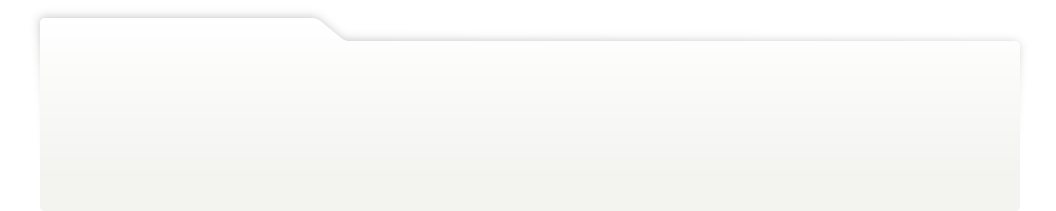
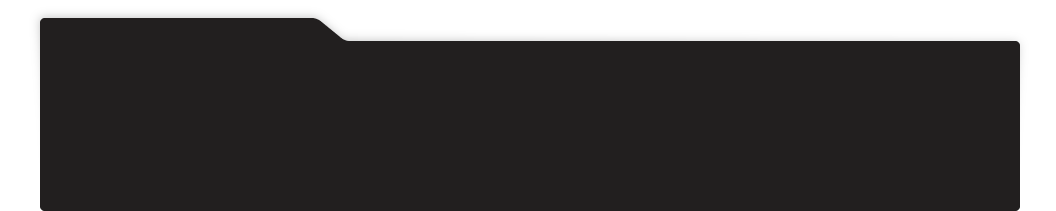
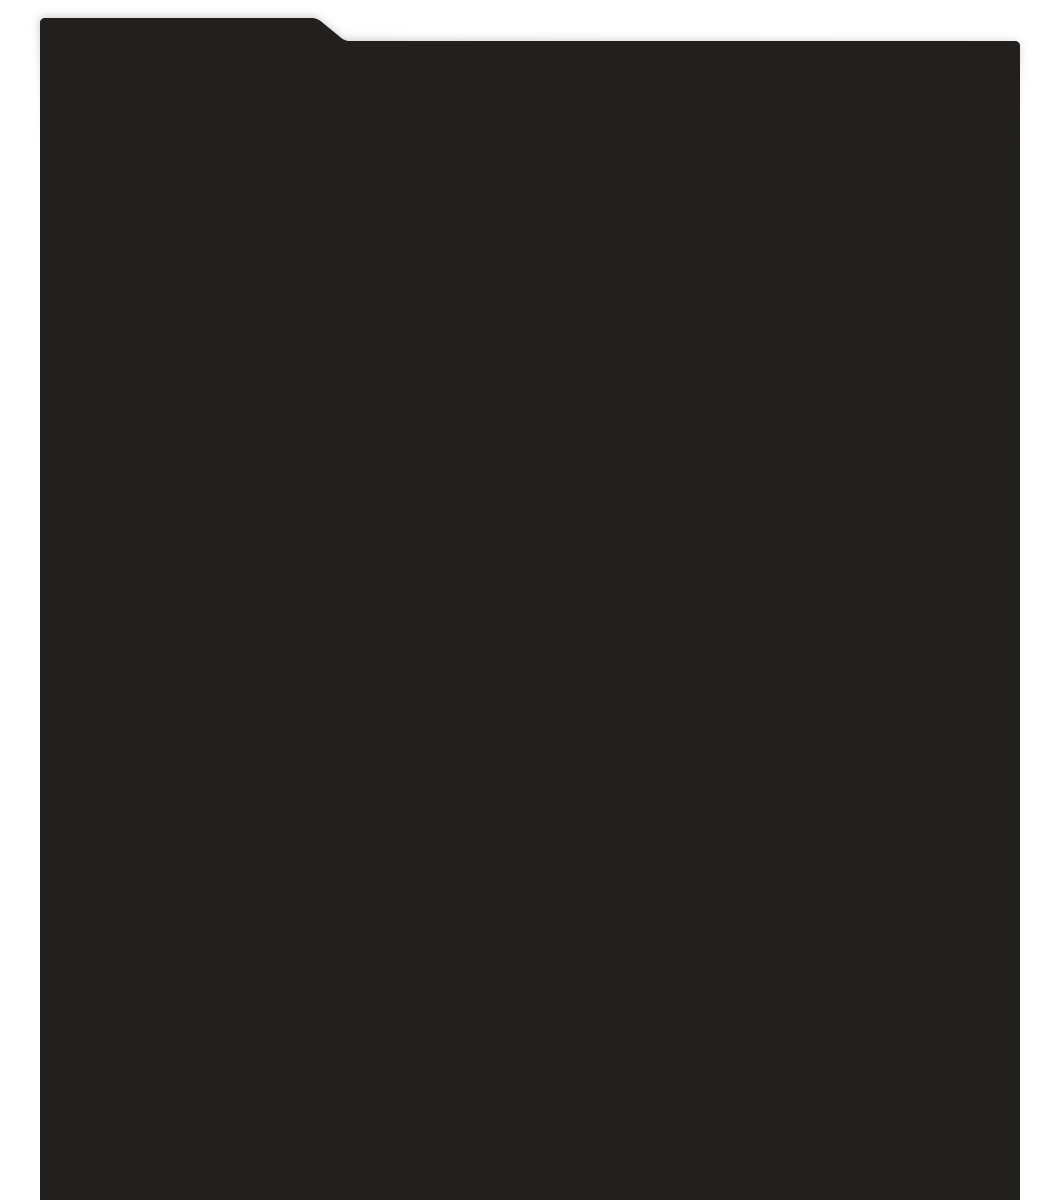
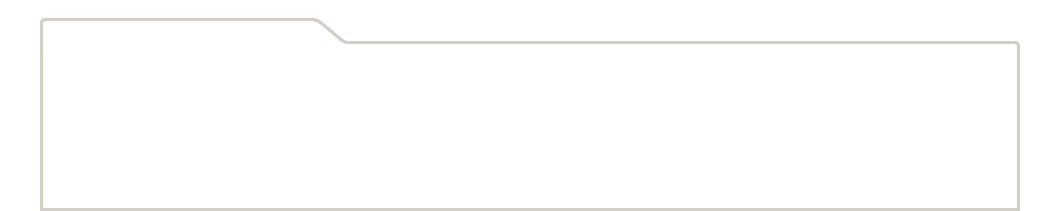
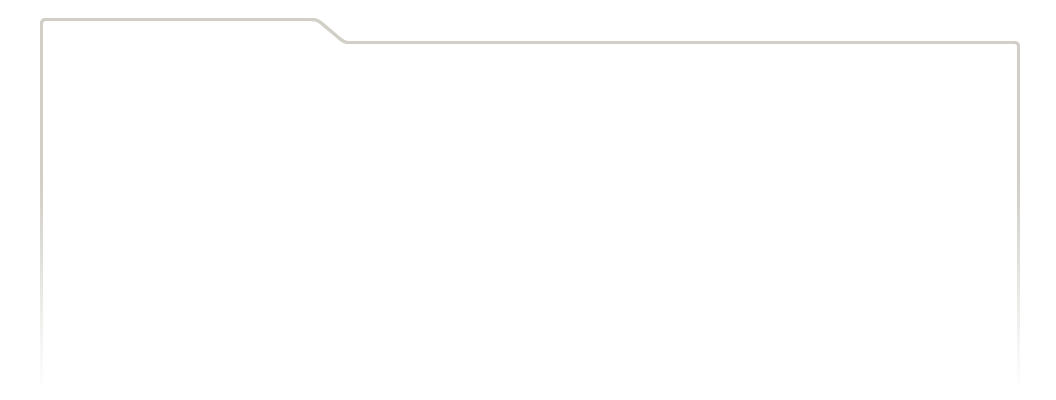
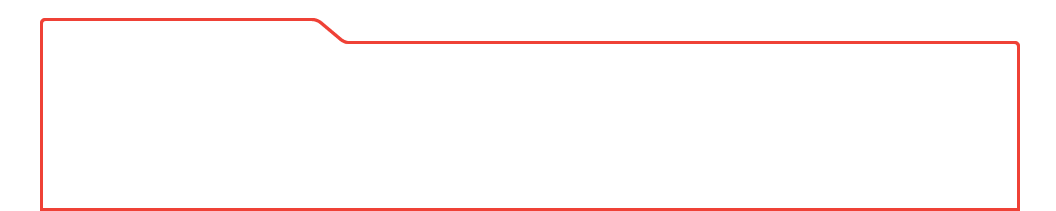
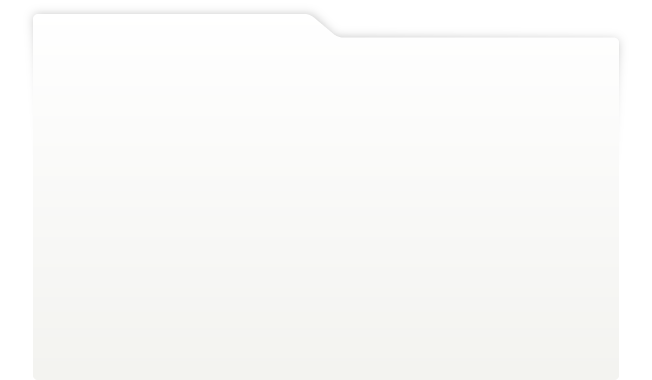
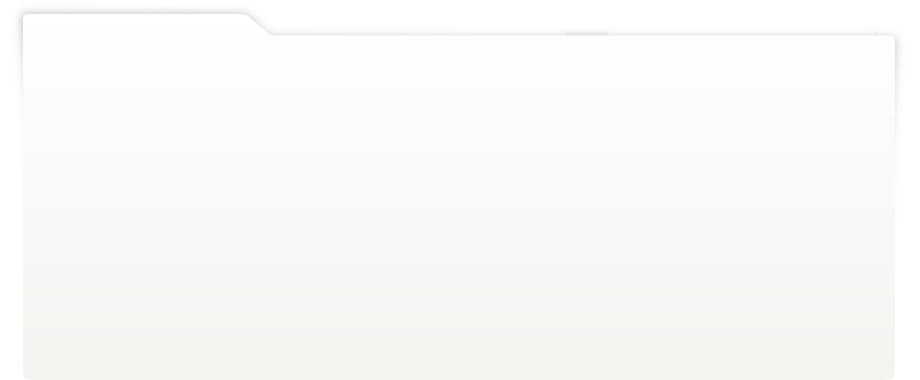
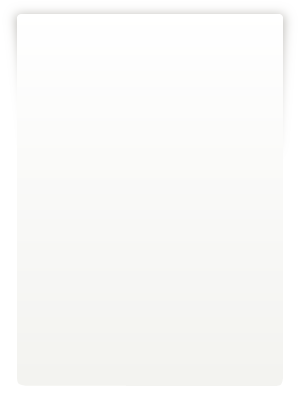
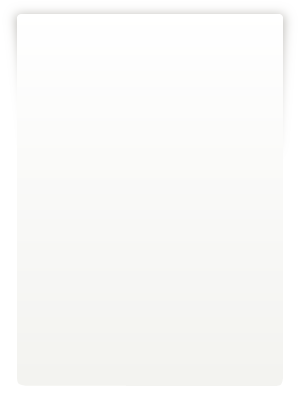
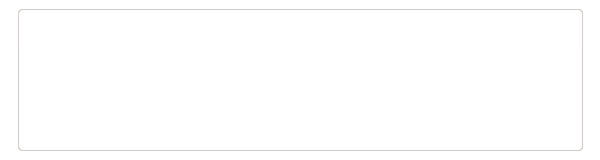
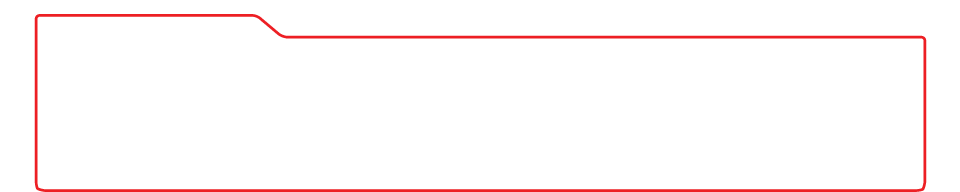
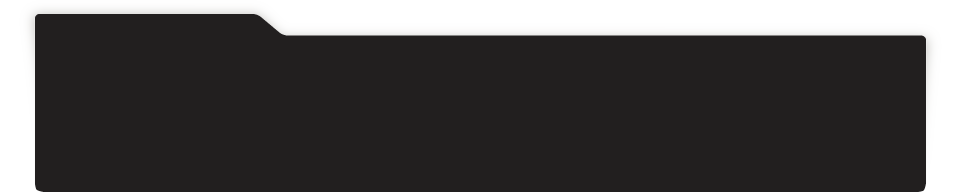
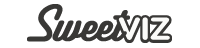
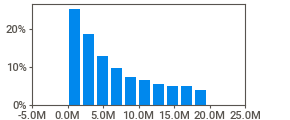
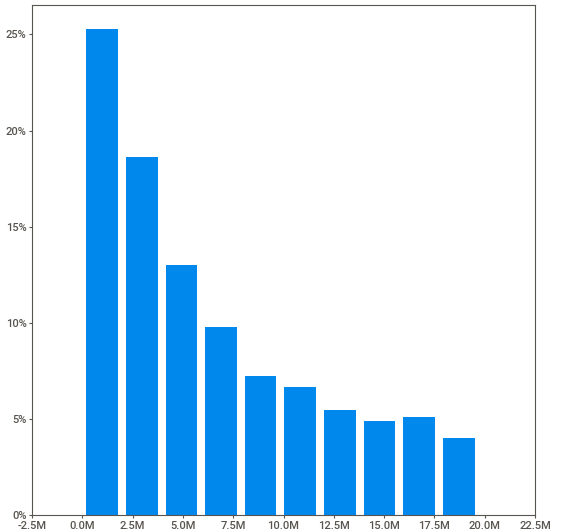
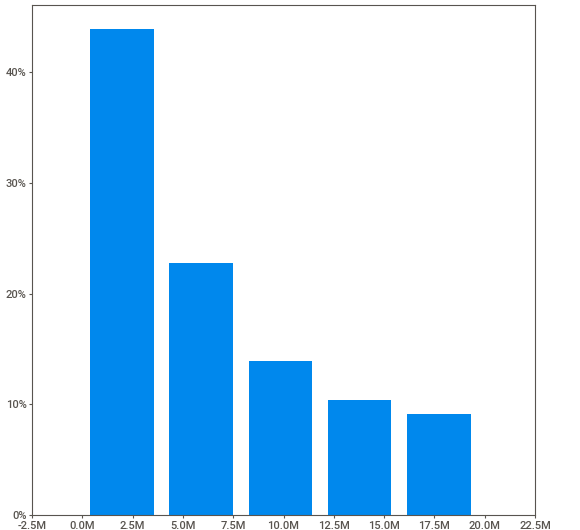
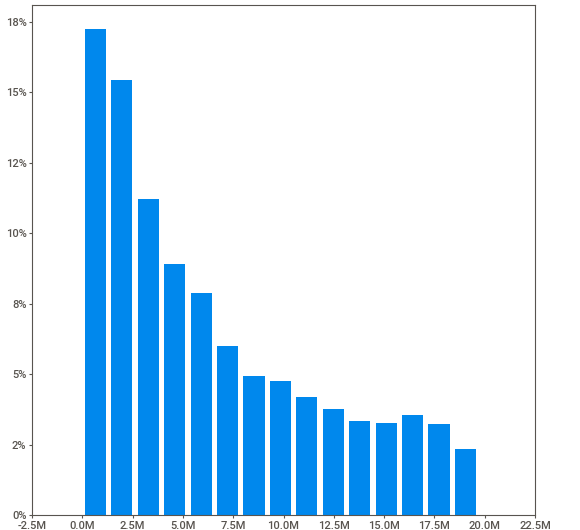
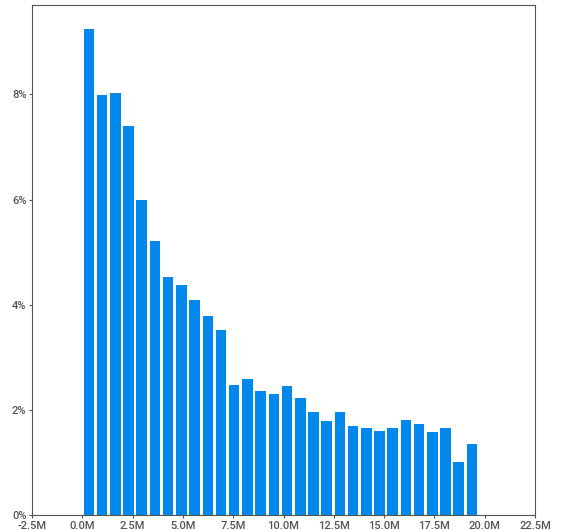
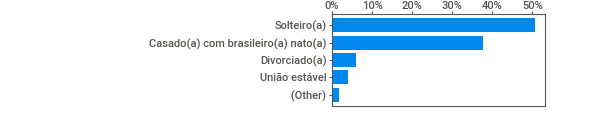
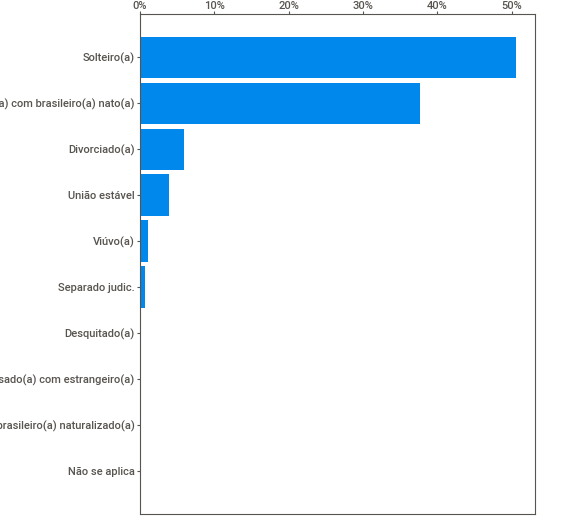
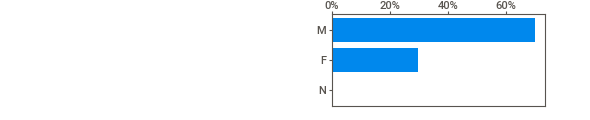
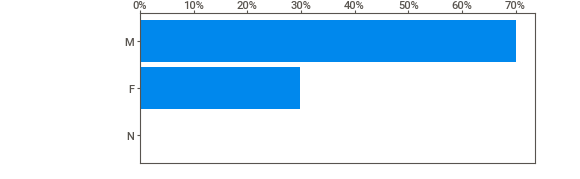
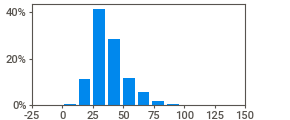
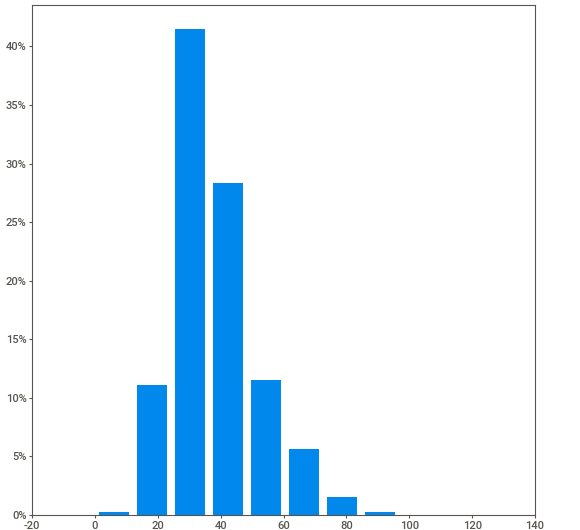
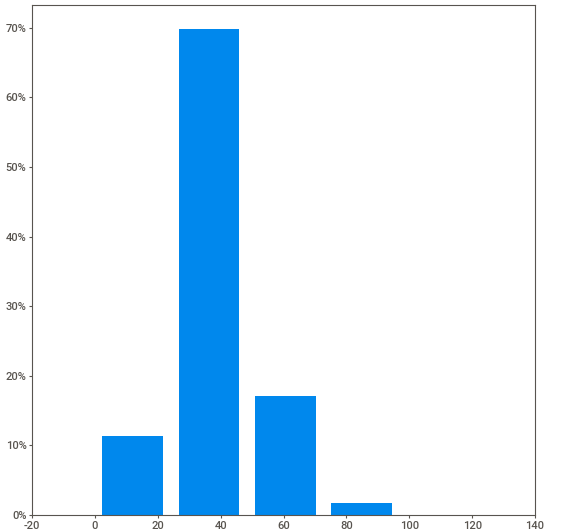
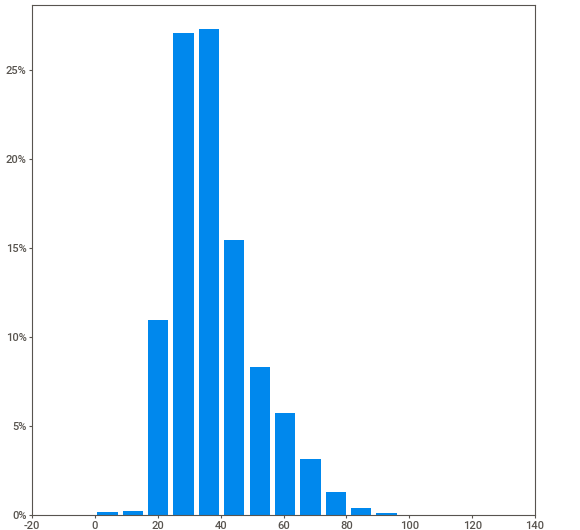
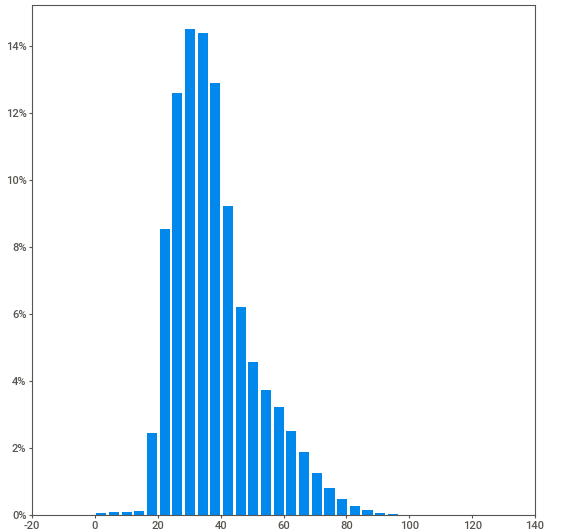
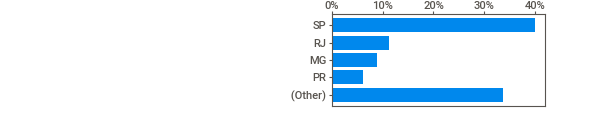
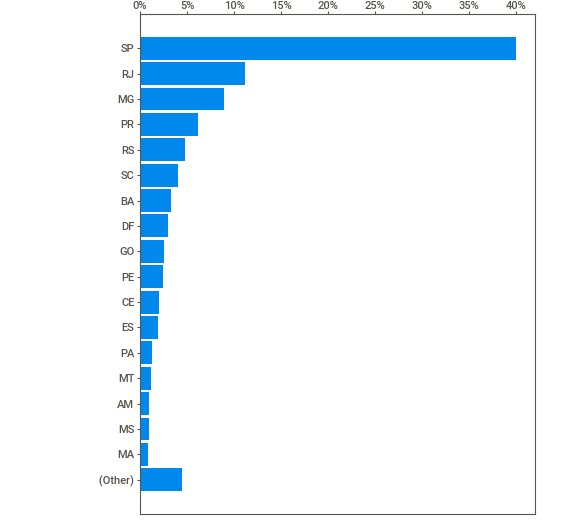
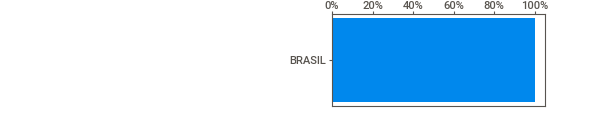
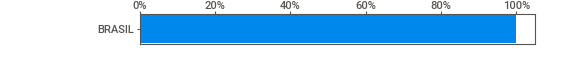
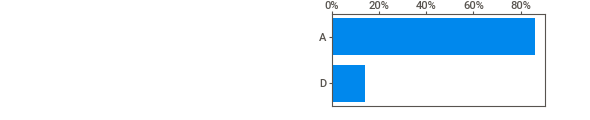
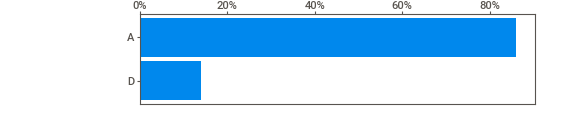
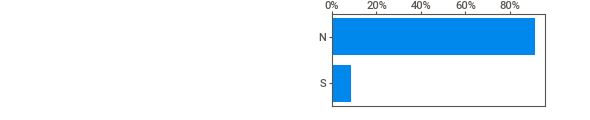
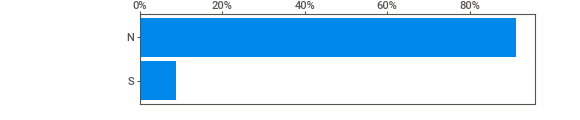
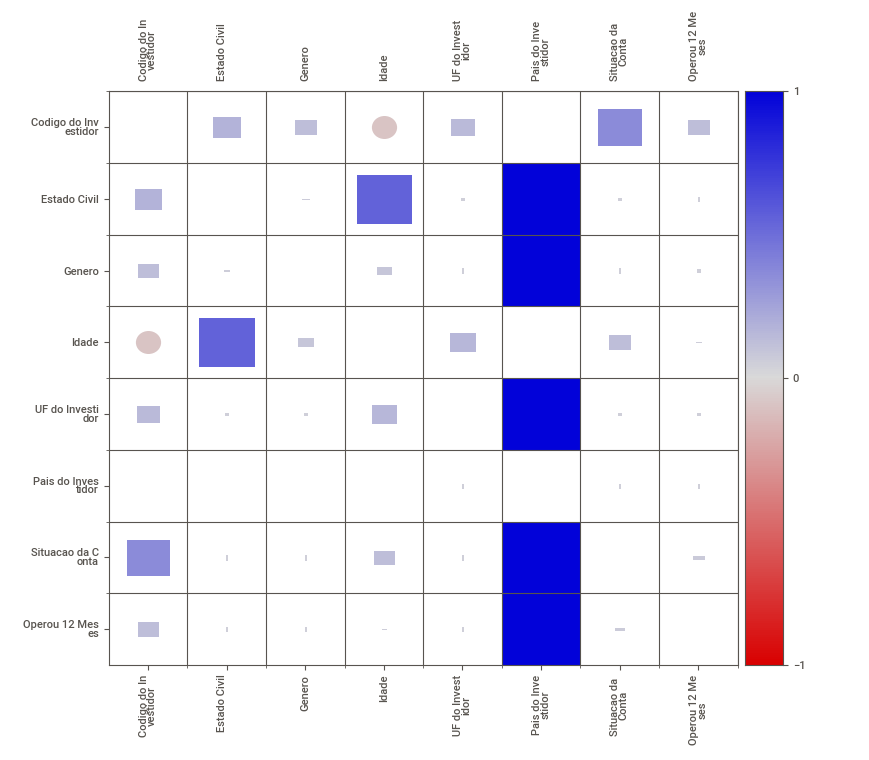
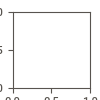

In [ ]:
#Inicialmente irei utilizar a biblioteca Sweetviz para explorar visualmente todo o dataset 
my_report = sv.analyze(tesourodireto)
my_report.show_notebook()

## 7. Insights  obtidos através da  Análise inicial com Sweetviz ⬇
  
Essa etapa tem como premissa  , criar uma conceitualização inicial e permitir um entendimento de como os dados estão    estruturados. 
Baseado na análise acima , É possível afirmar que o conjunto de dados possui: 6.379.965 Linhas , 13.435 Duplicadas , 11 Variáveis , sendo 9 Categóricas, 2 Numéricas  .

## Estatística descritiva variável  idade 

Mínimo: 0

Máximo: 121 ... (observar mais profundamente )


5-th percentile :  O percentil 5 é um valor associado ao local nos dados em que 5%  dos dados estão abaixo do valor , nesse caso o percentil 5 do nosso conjunto de dados é 22 .


Q1: O primeiro quartil (Q1) é definido como o número médio entre o menor número e a mediana do conjunto de dados , nesse caso o
(Q1) do nosso conjunto de dados é 29.


Mediana : É o valor que permite dividir uma série numérica ordenada em duas partes de um mesmo número de elementos , Nesse caso a mediana do nosso conjunto de dados é 36.


(Q3) É o valor médio entre a mediana e o valor mais alto do conjunto de Dados , Nesse caso o (Q3) do nosso conjunto de Dados é 45.



IQR : A variação interquartil (IQR) pode ser usada para identificar matematicamente os outliers de um conjunto de dados, Nesse caso o IQR do nosso conjunto de dados é 16 .


95-th percentile : O percentil 95 é o valor em que 5% dos dados  têm um valor maior, Nesse caso o 95-th percentile do nosso conjunto de dados é 64 .


Coeficiente de Variação : A distribuição encontra- se maior que 33% , Nesse caso a distribuição é heterogênea .


Desvio padrão : É o indicador utilizado para medir a dispersão de uma série estatística quantitativa , é igual a raiz quadrada da variância , Nesse caso o desvio padrão do nosso conjunto de dados é 12.98399408 .




MAD : Desvio absoluto médio , É a diferença absoluta entre um elemento específico, um outro ponto dado e à sua mediana, Nesse caso a MAD do nosso conjunto de dados é 8.



## Respondendo algumas perguntas : 


QUAL É O SEXO COM MAIOR  INCIDÊNCIA ?

Masculino .

QUAL É A MAIOR FREQUÊNCIA DAS IDADES ?

32 Anos .

QUAL É A CIDADE QUE TEM O MAIOR ÍNDICE DE INVESTIDORES ?

São Paulo .


QUAL É A PORCENTAGEM DA SITUAÇÃO DA CONTA ATIVA ?

86%.


O estado civil com a  maior porcentagem é Solteiro , sendo ; 51% equivalente a 3.2 Milhões

## 8. Limpeza e Transformação do Dataset ⬇ 
A LIMPEZA CONSTITUIRÁ EM REMOÇÃO DA COLUNA CÓDIGO DO INVESTIDOR, CONVERSÃO DA COLUNA DATA ,  REMOÇÃO DA COLUNA PAÍS DO INVESTIDOR , DEVIDO A SER UMA COLUNA PREVALECENTE , DESSE MODO, NÃO AGREGARÁ EM NADA NA EDA . TRANSFORMAÇÃO DAS (COLUNAS SITUAÇÃO DA CONTA E OPEROU 12 MESES) , POR FIM , REMOÇÃO DE VALORES DUPLICADOS .

In [ ]:
#REMOÇÃO DAS COLUNAS CÓDIGO DO INVESTIDOR E PAÍS DO INVESTIDOR 
tesourodireto = tesourodireto.drop(columns=['Codigo do Investidor','Pais do Investidor'])
tesourodireto.head()

,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Situacao da Conta,Operou 12 Meses
0,11/12/2008,Casado(a) com brasileiro(a) nato(a),M,ENGENHEIRO,71,SP,SAO PAULO,D,N
1,17/12/2008,Solteiro(a),M,BANCARIO E ECONOMIÁRIO,36,SP,SAO PAULO,D,N
2,22/12/2008,Solteiro(a),F,OUTROS,67,SP,SAO PAULO,D,N
3,29/12/2008,Casado(a) com brasileiro(a) nato(a),M,BANCARIO E ECONOMIÁRIO,57,SP,SAO PAULO,D,N
4,07/01/2009,Solteiro(a),F,SERVIDOR PÚBLICO FEDERAL,60,SP,SAO PAULO,D,N


In [ ]:
#Verificando os tipos de dados de cada coluna 
tesourodireto.dtypes

Data de Adesao          object
Estado Civil            object
Genero                  object
Profissao               object
Idade                    int64
UF do Investidor        object
Cidade do Investidor    object
Situacao da Conta       object
Operou 12 Meses         object
dtype: object

In [ ]:
#Observe que a coluna data de adesao tem um tipo de dado object , irei converter para o formato datetime 
tesourodireto['Data de Adesao'] = pd.to_datetime(tesourodireto['Data de Adesao'])

In [ ]:
#Observando se houve êxito na conversão 
tesourodireto.dtypes

Data de Adesao          datetime64[ns]
Estado Civil                    object
Genero                          object
Profissao                       object
Idade                            int64
UF do Investidor                object
Cidade do Investidor            object
Situacao da Conta               object
Operou 12 Meses                 object
dtype: object

In [ ]:
#Remoção das duplicatas
tesourodireto.drop_duplicates(keep=False,inplace=True)
 

In [ ]:
#Observando se foram removidas as duplicatas
tesourodireto.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6379960    False
6379961    False
6379962    False
6379963    False
6379964    False
Length: 5929583, dtype: bool

Conversão das colunas Situação da Conta e Operou 12 Meses ⬇

In [ ]:
tesourodireto = pd.get_dummies(tesourodireto, columns=["Operou 12 Meses","Situacao da Conta"])

In [ ]:
#checando
tesourodireto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5929583 entries, 0 to 6379964
Data columns (total 11 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Data de Adesao        datetime64[ns]
 1   Estado Civil          object        
 2   Genero                object        
 3   Profissao             object        
 4   Idade                 int64         
 5   UF do Investidor      object        
 6   Cidade do Investidor  object        
 7   Operou 12 Meses_N     uint8         
 8   Operou 12 Meses_S     uint8         
 9   Situacao da Conta_A   uint8         
 10  Situacao da Conta_D   uint8         
dtypes: datetime64[ns](1), int64(1), object(5), uint8(4)
memory usage: 384.5+ MB


 Ao explorar visualmente através da biblioteca sweetviz , fiz uma descoberta do valor máximo da idade , o que me fez explorar mais fundo . Através da análise abaixo pude observar que a  pessoa tem  121 anos de idade , genêro não especificado , a conta está desativada , porém houve uma operação nos últimos 12 meses . ⬇ 

In [ ]:
# caso a observar , me deixou curiosa o quesito idade 
tesourodireto.apply(np.max)

Data de Adesao                2021-12-05 00:00:00
Estado Civil                             Viúvo(a)
Genero                                          N
Profissao               VETERINÁRIO E ZOOTECNISTA
Idade                                         121
UF do Investidor                               TO
Cidade do Investidor                       ZORTEA
Operou 12 Meses_N                               1
Operou 12 Meses_S                               1
Situacao da Conta_A                             1
Situacao da Conta_D                             1
dtype: object

## 9. Análise de Séries Temporais ⬇

🧩 Contextualização da temática

Séries Temporais, É uma seqüência ordenada de valores de uma variável em intervalos de tempo igualmente espaçados .

# Perguntas Exploratórias:

◾Existem correlações fortes entre algumas colunas?

◾Qual é a média geral de uma variável relevante? Qual é a sua variância ?

◾Qual é o intervalo de valores que eu vejo? Eles variam por período de tempo ou outra unidade lógica de análise ?

◾Os dados parecem consistentes de um jeito uniforme ou sugerem mudanças na medição ou no comportamento ao longo do tempo?

In [ ]:
pip install datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
  tesourogroup = tesourodireto.groupby('Data de Adesao').sum()


In [ ]:
#Analisando as correlações 
tesourodireto.corr()

,Idade,Operou 12 Meses_N,Operou 12 Meses_S,Situacao da Conta_A,Situacao da Conta_D
Idade,1.000000,0.002948,-0.002948,-0.072943,0.072943
Operou 12 Meses_N,0.002948,1.000000,-1.000000,-0.107927,0.107927
Operou 12 Meses_S,-0.002948,-1.000000,1.000000,0.107927,-0.107927
Situacao da Conta_A,-0.072943,-0.107927,0.107927,1.000000,-1.000000
Situacao da Conta_D,0.072943,0.107927,-0.107927,-1.000000,1.000000


 Inicialmente irei plotar um gráfico de calor , para observar se existe correlçaõ forte entre alguma coluna . ⬇

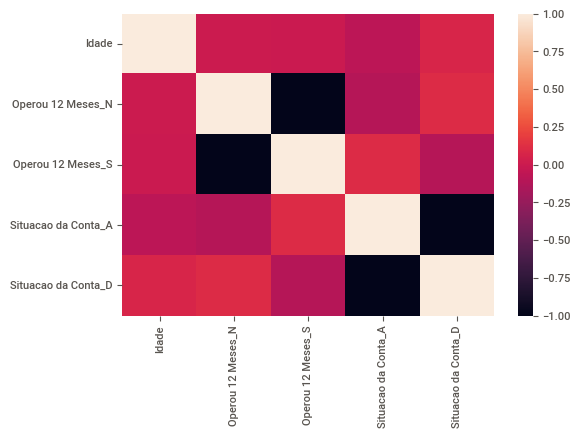

In [ ]:
#Analisando visualmente 
sns.heatmap(tesourodireto.corr())


In [ ]:
#Variância padrão do conjunto de dados usando a função std
from scipy.stats.morestats import Std_dev
Std_dev = tesourodireto.std()
print(Std_dev)


Data de Adesao         1053 days 14:33:44.385419312
Idade                                     13.081836
Operou 12 Meses_N                          0.289018
Operou 12 Meses_S                          0.289018
Situacao da Conta_A                         0.35318
Situacao da Conta_D                         0.35318
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
#Utilizei a função skew para encontrar a assimetria nos dados sobre o eixo do índice.

tesourodireto.skew()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Idade                  0.946743
Operou 12 Meses_N     -2.823387
Operou 12 Meses_S      2.823387
Situacao da Conta_A   -2.004232
Situacao da Conta_D    2.004232
dtype: float64

In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tesourotest = tesourogroup

In [ ]:
#tesourotest = tesourotest.drop(["1900-01-01"])
tesourotestplot = tesourotest[tesourotest.index >= "2020-01-01"]
tesourotestplot

,Idade,Operou 12 Meses_N,Operou 12 Meses_S,Situacao da Conta_A,Situacao da Conta_D
Data de Adesao,,,,,
2020-01-01,240,5.0,1.0,6.0,0.0
2020-01-02,377,7.0,4.0,11.0,0.0
2020-01-03,63,2.0,0.0,2.0,0.0
2020-01-04,119572,3081.0,207.0,3225.0,63.0
2020-01-05,292,4.0,2.0,6.0,0.0
...,...,...,...,...,...
2021-12-01,220900,5652.0,441.0,6019.0,74.0
2021-12-02,165855,4094.0,259.0,4320.0,33.0
2021-12-03,226181,5846.0,282.0,6061.0,67.0


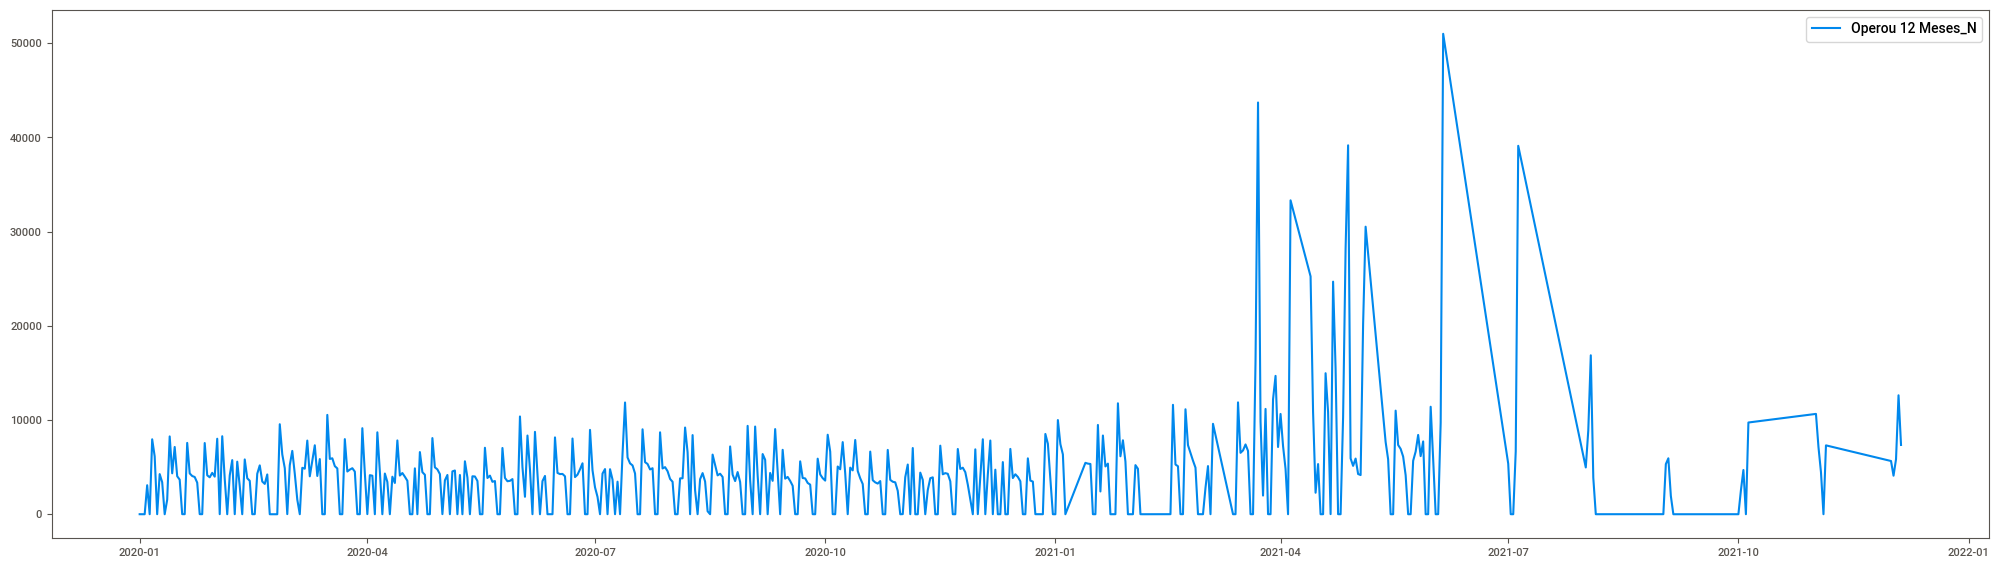

In [ ]:

fig = plt.figure(figsize=(25,7))
plt.plot(tesourotestplot.index, tesourotestplot["Operou 12 Meses_N"], label = "Operou 12 Meses_N")
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend()
plt.show()

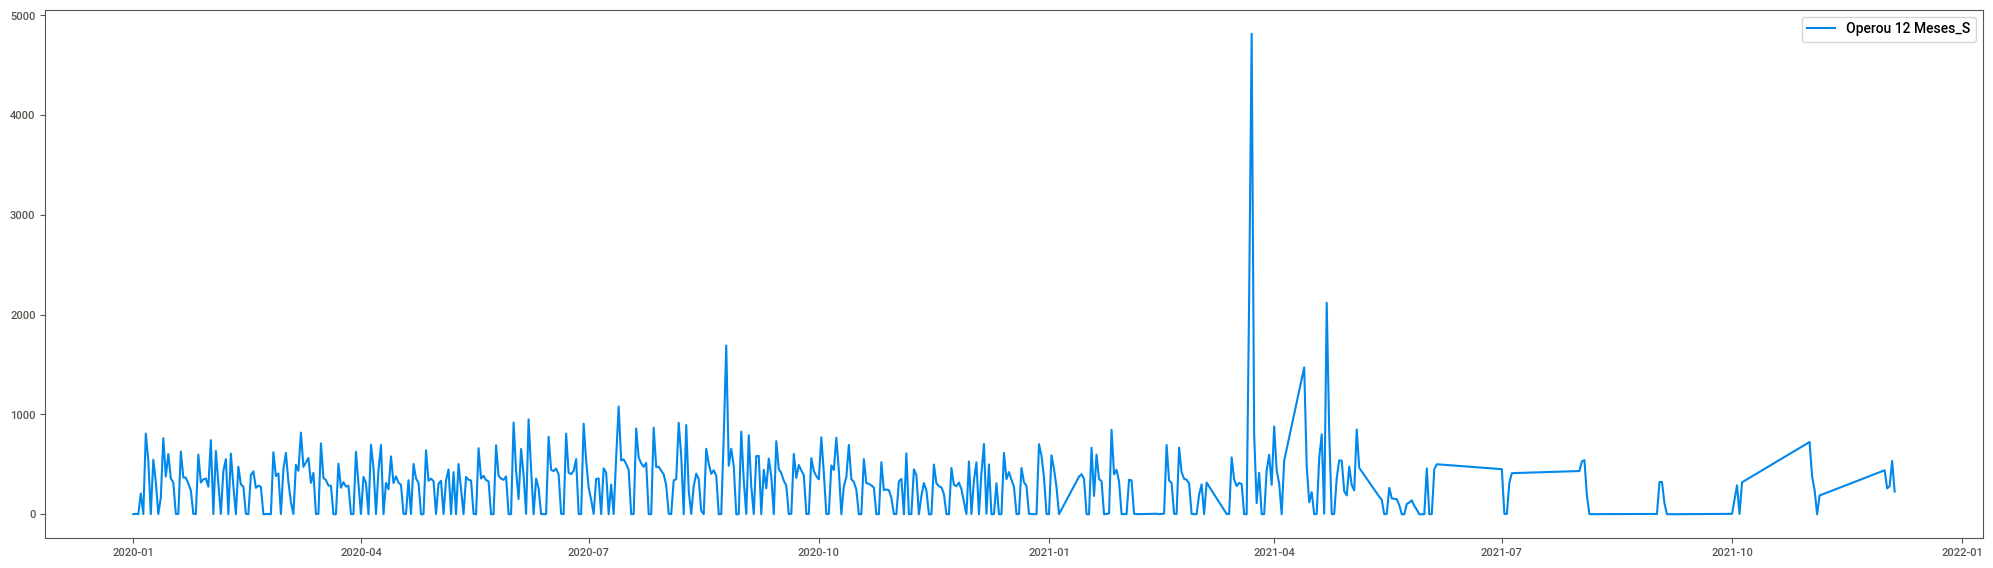

In [ ]:

fig = plt.figure(figsize=(25,7))
plt.plot(tesourotestplot.index, tesourotestplot["Operou 12 Meses_S"], label = "Operou 12 Meses_S")
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend()
plt.show()

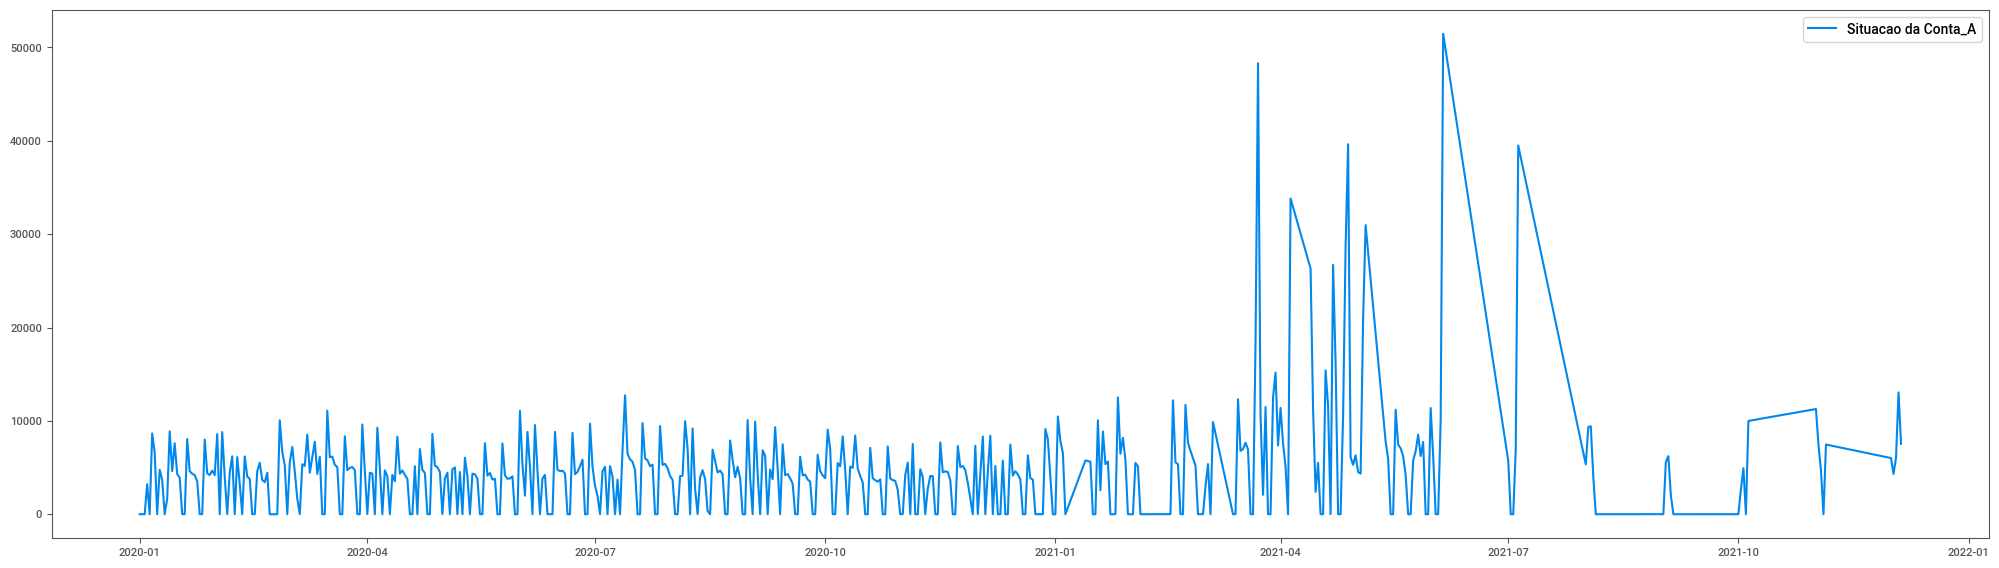

In [ ]:
fig = plt.figure(figsize=(25,7))
plt.plot(tesourotestplot.index, tesourotestplot["Situacao da Conta_A"], label = "Situacao da Conta_A")
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend()
plt.show()

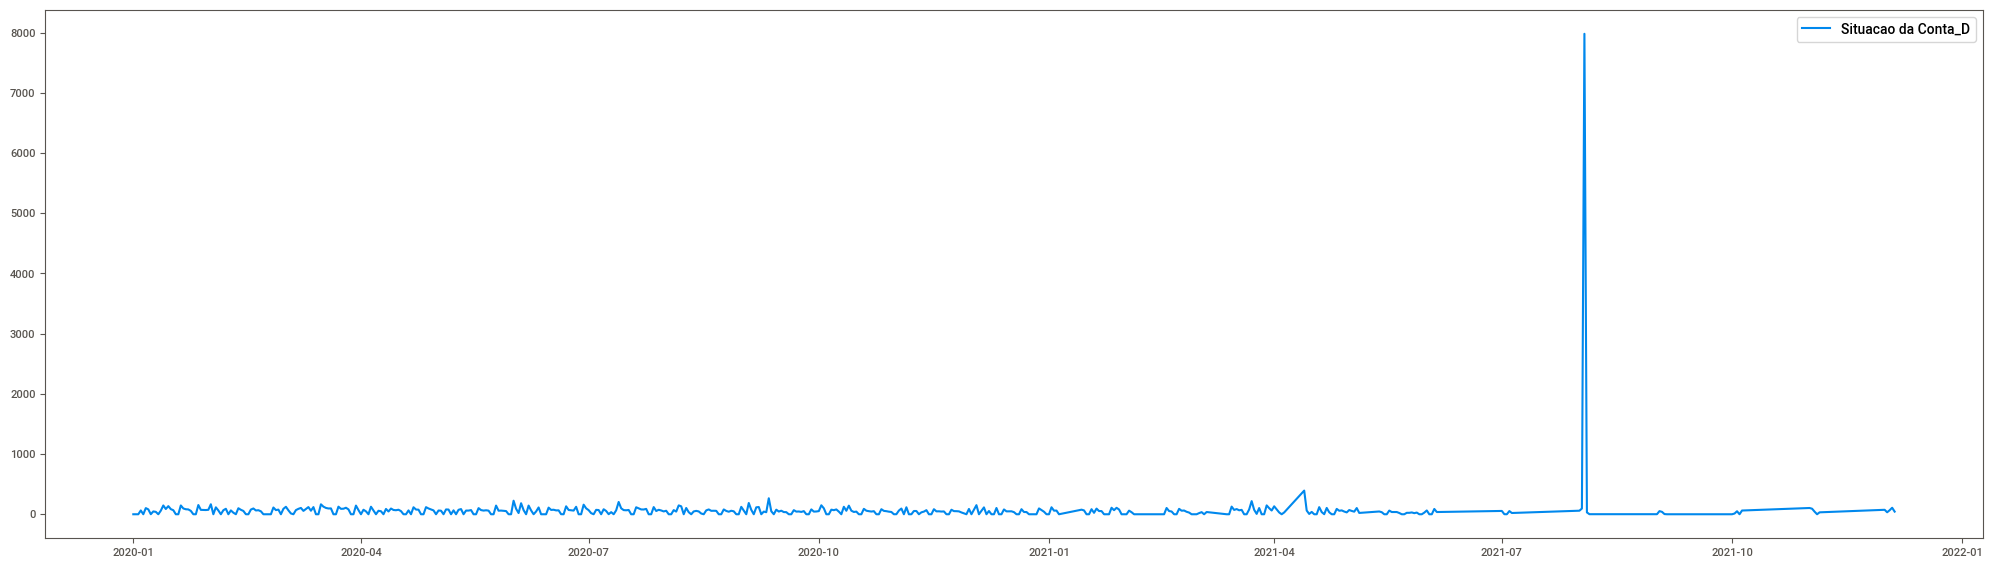

In [ ]:
fig = plt.figure(figsize=(25,7))
plt.plot(tesourotestplot.index, tesourotestplot["Situacao da Conta_D"], label = "Situacao da Conta_D")
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend()
plt.show()

## Conclusão 
◾Existem correlações fortes entre algumas colunas?

Segundo a visualizacão feita com a  biblioteca sweetviz , há correlações entre as colunas Estado Civil, UF do Investidor, Situacao 
da Conta,Genero,Operou 12 Meses.



◾Qual é a média geral de uma variável relevante? Qual é a sua variância ?

Idade , 13.081836

◾Qual é o intervalo de valores que eu vejo? Eles variam por período de tempo ou outra unidade lógica de análise ?

 Os Dados da coluna (operou 12 meses sim) parecem consistentes até um determinado período , porém em setembro teve um leve aumento de operações e nesse mês de setembro foi o segundo consecutivo em que houve queda no número de mortes por covid , nos meses a seguir a sazionalidade volta , e há um pico no mês de abril e maio de 2021 , justamente quando ocorre um pico de mortes por covid, o que me leva a relacionar que as pessoas estavam preocupadas com o seu futuro financeiro .


◾Os dados parecem consistentes de um jeito uniforme ou sugerem mudanças na medição ou no comportamento ao longo do tempo?

Os Dados tem uma mudança de comportamento , que tem como fator contribuinte A COVID-19.



## Em Síntese , pode ser concluído que o perfil do investidor do Tesouro Direto tem como perfis principais ; Homens , Idade 32 anos , Residem no estado de SP, Estado civil , Solteiro e fizeram operações nos últimos 12 meses  .

 